In [1]:
import numpy as np
from numpy.linalg import matrix_power, eigvals
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
p_var = .25
r_var = .5
q_var = 1 - p_var - r_var
N = 10

def create_transition(p, r, q, N):
    head = np.array([p_var + r_var, q_var] + [0 for _ in range(N-2)])
    tail = np.array([0 for _ in range(N-2)] + [p_var, r_var + q_var])
    body = np.array([p_var, r_var, q_var] + [0 for _ in range(N-3)])
    return np.stack([head] + [np.roll(body, i) for i in range(N-2)] + [tail])

def get_eigen(P):
    return np.sort(eigvals(P))[-2]

In [3]:
# Plot evolution of eigenvalues of transition matrix
x = np.arange(3, 1000)
y = np.log(1-np.array([get_eigen(create_transition(p_var, r_var, q_var, k)) for k in x])) / np.log(x)

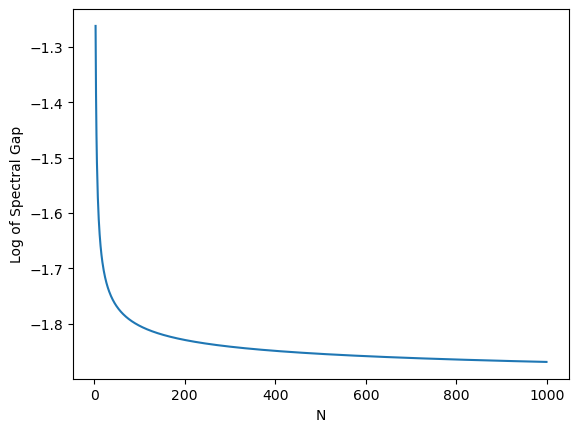

In [4]:
plt.plot(x, y)
plt.xlabel("N")
plt.ylabel("Log of Spectral Gap")
plt.show()

In [5]:
# Plot evolution of eigenvalues of Toeplitz matrix
x = np.arange(3, 1000)
y = np.log(1 - np.array([0.5 + 0.5 * np.cos(np.pi/(k+1)) for k in x])) / np.log(x)

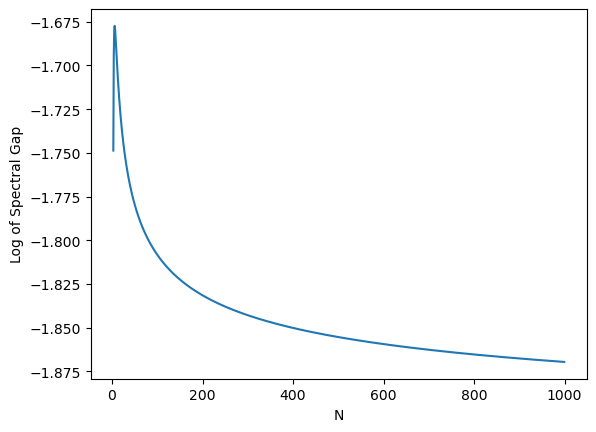

In [ ]:
plt.plot(x, y)
plt.xlabel("N")
plt.ylabel("Log of Spectral Gap")
plt.show()

# Simulations

In [10]:
p_var = .25
r_var = .5
q_var = 1 - p_var - r_var
N = 100
N_SIMS = 1000

In [11]:
def tv(p1, p2):
    return (0.5 * np.abs(p1-p2)).sum()

In [12]:
# invariant measure for 2 particles
pi = np.ones(N) / N
choices = np.arange(N)

In [13]:
P = create_transition(p_var, r_var, q_var, N)

In [14]:
inits = []
for i in range(N):
    new_init = np.zeros(N)
    new_init[i] = 1.
    inits.append(new_init)

In [15]:
res = []
for init in inits:
    conv = []
    for i in range(3, N_SIMS):
        conv.append(tv(init @ matrix_power(P, i), pi))
    res.append(conv)

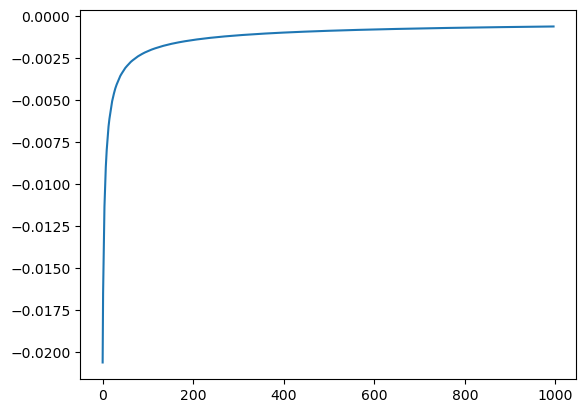

In [16]:
x = np.arange(3, N_SIMS)
plt.plot(np.log(res[2])/x)